In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Variables
ROOT_PATH = os.path.abspath("../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/")
MODEL_PATH = os.path.join(ROOT_PATH, "data/training/training_results/BL")

# Loading Files
For the baseline model I load the first old and unreduced files to preserve the original distributions.

In [18]:
# Reading from specified folder
selected_spec = os.path.join(INPUT_FOLDER, "processed_files/CCLASS/")

X_train = pd.read_pickle(os.path.join(selected_spec, "X_train_df.pkl"))
y_train = pd.read_pickle(os.path.join(selected_spec, "y_train_df.pkl"))
X_test = pd.read_pickle(os.path.join(selected_spec, "X_test_df.pkl"))
y_test = pd.read_pickle(os.path.join(selected_spec, "y_test_df.pkl"))

selected_spec = os.path.join(INPUT_FOLDER, "B")

y_train_pred_B = pd.read_pickle(os.path.join(selected_spec, "X_train_df.pkl"))["DEP_DELAY(MINS)"].to_numpy()
y_train_true_B = pd.read_pickle(os.path.join(selected_spec, "y_train_df.pkl")).to_numpy().ravel()
y_test_pred_B = pd.read_pickle(os.path.join(selected_spec, "X_test_df.pkl"))["DEP_DELAY(MINS)"].to_numpy()
y_test_true_B = pd.read_pickle(os.path.join(selected_spec, "y_test_df.pkl")).to_numpy().ravel()

Data_train_show = X_train.copy()
Data_train_show["y"] = y_train
Data_train_show

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC),y
5998106,107,89,74,-0.433884,-0.900969,-0.985556,0.169350,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0,0,0.4,2
9744846,-3,106,83,0.433884,-0.900969,0.496217,-0.868199,255.576,9.000744,1525.176514,...,2,0,0,0,0,0,0,0,0.8,1
8656393,64,98,53,-0.781831,0.623490,-0.548293,-0.836286,255.576,9.000744,1525.176514,...,0,0,0,0,0,3,0,2,0.4,2
7404998,-2,121,88,-0.433884,-0.900969,-0.719340,0.694658,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0.8,0
8855927,15,132,74,0.433884,-0.900969,-0.845728,0.533615,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,2,0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,95,-0.781831,0.623490,0.678801,-0.734323,229.648,9.854184,823.857302,...,0,0,0,0,0,0,0,0,0.2,1
7551519,-8,142,74,0.000000,1.000000,-0.649448,-0.760406,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,0,0.2,0
7375452,-4,122,58,0.433884,-0.900969,-0.999914,-0.013090,264.836,13.639800,2071.070234,...,0,0,0,0,2,2,2,2,0.2,1
7757994,180,92,62,-0.781831,0.623490,-0.608761,0.793353,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,1.0,2


## Convert the data from DataFrames to np.arrays

In [19]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [20]:
y_train

array([2, 1, 2, ..., 1, 2, 1], dtype=int64)

Values in y_train: [0 1 2]
Number of value counts in y_train: [ 71145 157691  34368]
prob_0:0.27030364280178115
prob_1:0.5991208340298779
prob_2:0.1305755231683409


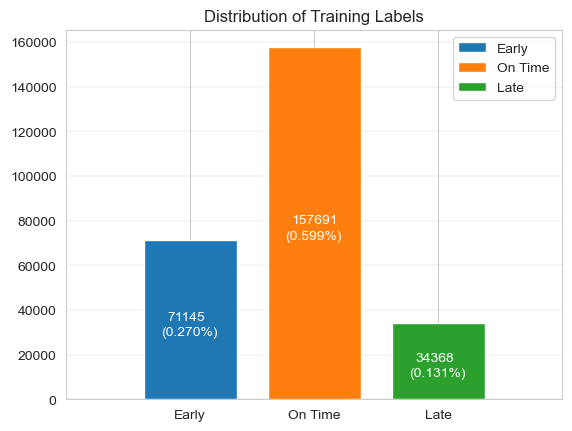

In [21]:
vals, counts = np.unique(y_train, return_counts=True)
print("Values in y_train: " + str(vals))
print("Number of value counts in y_train: " + str(counts))
prob_0 = counts[0] / len(y_train)
prob_1 = counts[1] / len(y_train)
prob_2 = counts[2] / len(y_train)
print("prob_0:"+ str(prob_0) +"\nprob_1:"+ str(prob_1) +"\nprob_2:"+ str(prob_2))

fig, ax = plt.subplots(1,1)

width = 0.75

ax.set_title("Distribution of Training Labels")
ax.set_xticks([0,1,2])
ax.set_xlim(-1,3)

ax.grid(True, axis="y", linewidth=0.25)

labels = ["Early", "On Time", "Late"]
prob_list = [prob_0, prob_1, prob_2]
ax.set_xticklabels(labels)
for cnt, v in enumerate(labels):
    ax.bar(x = cnt, height = counts[cnt], label = v, width=width)
    t1_height = counts[cnt] / 2
    ax.text(x = cnt - width / 4, y = t1_height, s = str(counts[cnt]), color="#FFFFFF")
    ax.text(x = cnt - width / 3.2, y = t1_height - 7000, s = f"({prob_list[cnt]:.3f}%)", color="#FFFFFF")

ax.legend()
print()

In [22]:
np.random.seed(42)

#Train Files
y_pred_train_bl1 = np.random.choice([0,1,2], size=(len(X_train), 1), p=[1/3,1/3,1/3])
y_pred_train_bl2 = np.random.choice([0,1,2], size=(len(X_train), 1), p=[prob_0,prob_1,prob_2])
y_pred_train_bl3 = np.ones(len(X_train), dtype=int)
y_pred_train_bl4 = list(pd.cut(y_train_pred_B, bins=[-float("inf"),-15,15,float("inf")], labels=[0,1,2]))

#Test Files
y_pred_test_bl1 = np.random.choice([0,1,2], size=(len(X_test), 1), p=[1/3,1/3,1/3])
y_pred_test_bl2 = np.random.choice([0,1,2], size=(len(X_test), 1), p=[prob_0,prob_1,prob_2])
y_pred_test_bl3 = np.ones(len(X_test), dtype=int)
y_pred_test_bl4 = list(pd.cut(y_test_pred_B, bins=[-float("inf"),-15,15,float("inf")], labels=[0,1,2]))

In [23]:
# Converting True Targets to DataFrame and Save as .pkl
y_train_true = pd.DataFrame(y_train, columns=["y_train_BL_true"])
y_test_true = pd.DataFrame(y_test, columns=["y_test_BL_true"])
y_train_true.to_pickle(os.path.join(MODEL_PATH,"y_train_true.pkl"))
y_test_true.to_pickle(os.path.join(MODEL_PATH,"y_test_true.pkl"))


y_train_true_B = pd.DataFrame(y_train_true_B, columns=["y_train_BL_true"])
y_test_true_B = pd.DataFrame(y_test_true_B, columns=["y_test_BL_true"])
y_train_true_B.to_pickle(os.path.join(MODEL_PATH,"y_train_true_B.pkl"))
y_test_true_B.to_pickle(os.path.join(MODEL_PATH,"y_test_true_B.pkl"))

#Converting Train Targets to DataFrame
y_train_pred_even = pd.DataFrame(y_pred_train_bl1, columns=["y_train_pred_BL_even"])
y_train_pred_dist = pd.DataFrame(y_pred_train_bl2, columns=["y_train_pred_BL_dist"])
y_train_pred_maj = pd.DataFrame(y_pred_train_bl3, columns=["y_train_pred_BL_maj"])
y_train_pred_delay = pd.DataFrame(y_pred_train_bl4, columns=["y_train_pred_BL_delay"])
#Converting Test Targets to DataFrame
y_test_pred_even = pd.DataFrame(y_pred_test_bl1, columns=["y_test_pred_BL_even"])
y_test_pred_dist = pd.DataFrame(y_pred_test_bl2, columns=["y_test_pred_BL_dist"])
y_test_pred_maj = pd.DataFrame(y_pred_test_bl3, columns=["y_test_pred_BL_maj"])
y_test_pred_delay = pd.DataFrame(y_pred_test_bl4, columns=["y_test_pred_BL_delay"])

#Saving Train Targets as .pkl
y_train_pred_even.to_pickle(os.path.join(MODEL_PATH,"y_train_pred_even.pkl"))
y_train_pred_dist.to_pickle(os.path.join(MODEL_PATH,"y_train_pred_dist.pkl"))
y_train_pred_maj.to_pickle(os.path.join(MODEL_PATH,"y_train_pred_maj.pkl"))
y_train_pred_delay.to_pickle(os.path.join(MODEL_PATH,"y_train_pred_delay.pkl"))
#Saving Test Targets as .pkl
y_test_pred_even.to_pickle(os.path.join(MODEL_PATH,"y_test_pred_even.pkl"))
y_test_pred_dist.to_pickle(os.path.join(MODEL_PATH,"y_test_pred_dist.pkl"))
y_test_pred_maj.to_pickle(os.path.join(MODEL_PATH,"y_test_pred_maj.pkl"))
y_test_pred_delay.to_pickle(os.path.join(MODEL_PATH,"y_test_pred_delay.pkl"))